### Imports

Scikit Learn's pre-loaded iris dataset.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

### Load Data
Scikit Learn datasets are functions that return an object containing the data we need. 

In [21]:
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Putting together the pandas dataframe

In [6]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [9]:
#species =data['target']
species =pd.DataFrame(data=data['target'])
species.columns = ['species']
species.head(2)

,species
0,0
1,0


In [10]:
features = pd.DataFrame(data=data['data'], columns=data['feature_names'])
features.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [12]:
df = species.merge(features, left_index =True, right_index=True)
df.head(2)

,species,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2


Mapping target names so we can see which species correspond to which 'target'

In [13]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
species_names = {key :value for key ,value in enumerate(data['target_names'])}
species_names

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [18]:
df['labels'] =df['species'].map(species_names)
df['labels'].head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: labels, dtype: object

In [127]:
df.head(3)

,species,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,0,5.1,3.5,1.4,0.2,setosa
1,0,4.9,3.0,1.4,0.2,setosa
2,0,4.7,3.2,1.3,0.2,setosa


### Plotting

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Pairplot
A good overview

Plotting the pairwise relationships in the dataset, the diagonal with density plots and the hue discriminating the species.

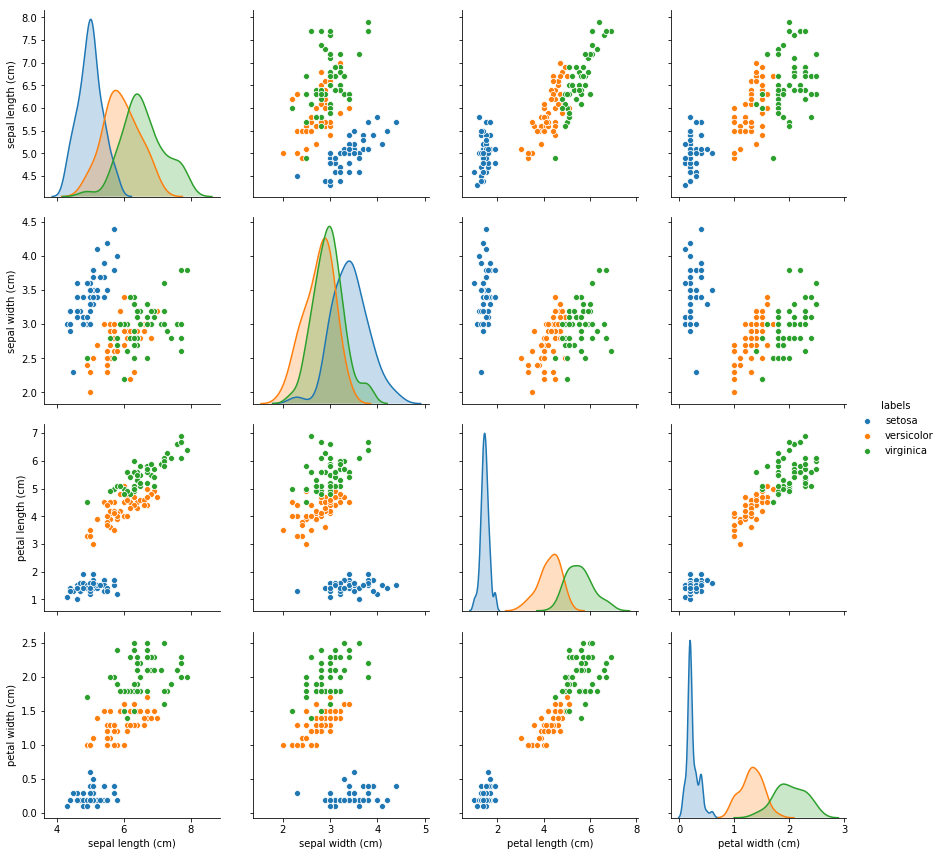

In [124]:
sns.pairplot(df.drop("species", axis=1), hue="labels", height=3, diag_kind="kde");

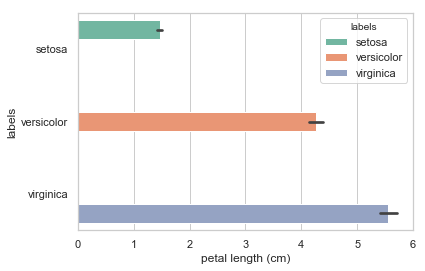

In [311]:
sns.barplot(x = "petal length (cm)", y='labels', hue = "labels",\
            palette= 'Set2', data = df);

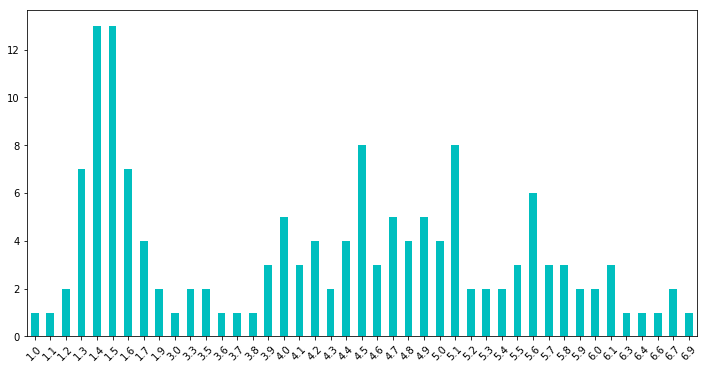

In [191]:
plt.figure(figsize= (12,6))
df['petal length (cm)'].value_counts().sort_index().plot.bar(\
                        label="labels",color='c')
plt.xticks(rotation=45);

### Histogram

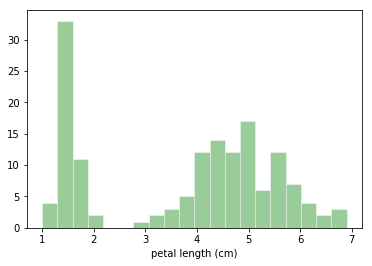

In [23]:
sns.distplot(features['petal length (cm)'], hist=True, kde=False, \
             color = 'g', hist_kws={'edgecolor':'white'},
         bins = (20));

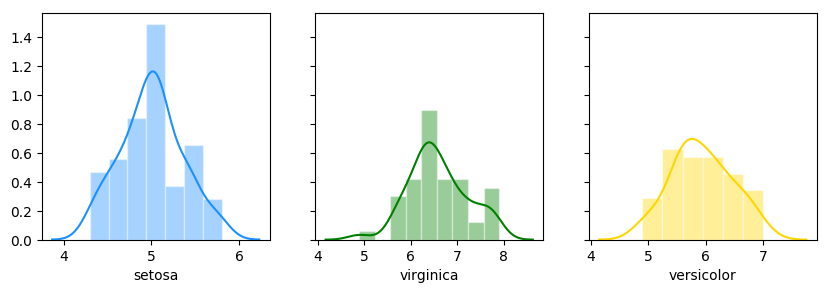

In [158]:
x1 = df.loc[df.labels=='setosa', ["sepal length (cm)"]]
x2 = df.loc[df.labels=='virginica', ["sepal length (cm)"]]
x3 = df.loc[df.labels=='versicolor', ["sepal length (cm)"]]

fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", hist_kws={'edgecolor':'white'}, \
             ax=axes[0], axlabel='setosa')
sns.distplot(x2 , color="green", ax=axes[1], hist_kws={'edgecolor':'white'}, \
             axlabel='virginica')
sns.distplot(x3 , color="gold", ax=axes[2], hist_kws={'edgecolor':'white'}, \
             axlabel='versicolor');

### Line plot

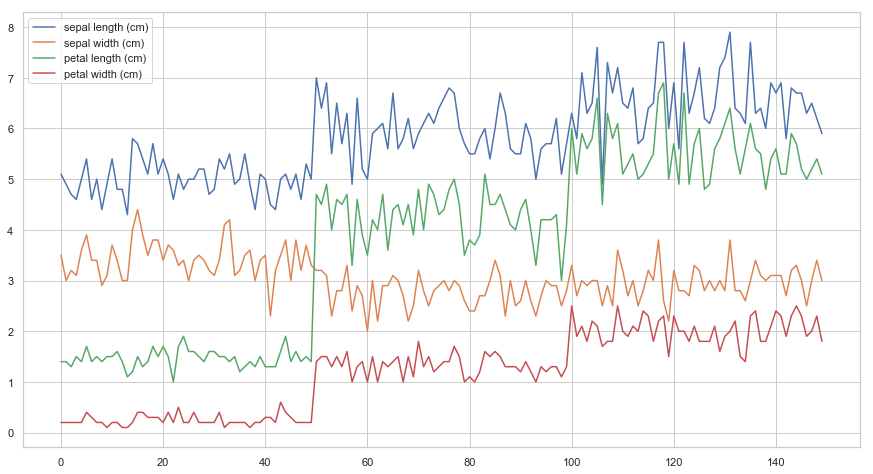

In [326]:
#sort it by sum
plt.figure(figsize=(15,8))
sns.lineplot(data=df.drop(['species', 'labels'], axis=1), dashes=False);

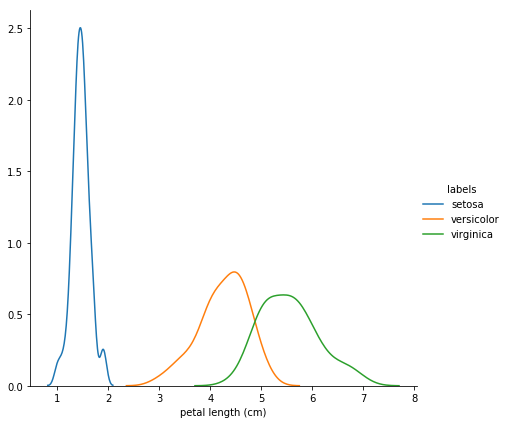

In [128]:
# kde plot creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(df, hue="labels", height=6) \
   .map(sns.kdeplot, "petal length (cm)") \
   .add_legend();

### Box plots
Illustrate the median, upper and lower quartiles, and the sample minimum and maximum as a helpful visual summary of the feature distributions.

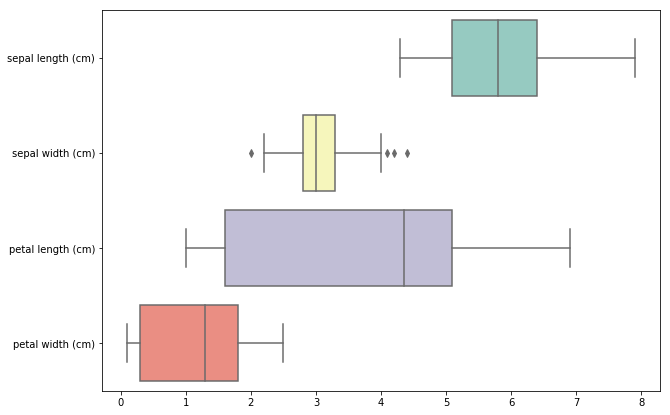

In [226]:
#boxplot for each numeric variable
plt.figure(figsize=(10,7))
sns.boxplot(data=features, orient='h', palette='Set3');

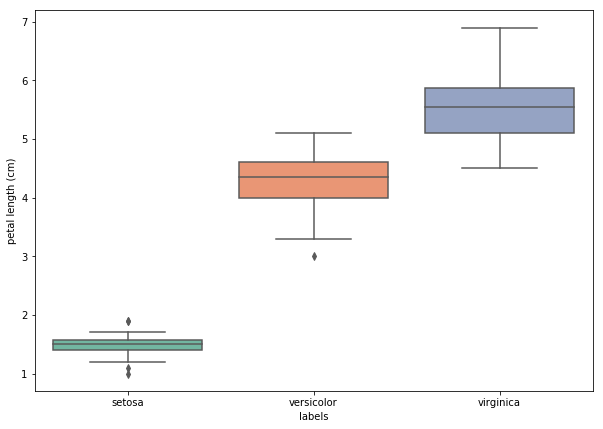

In [46]:
plt.figure(figsize=(10,7))
sns.boxplot(x="labels", y='petal length (cm)', data=df, palette='Set2');

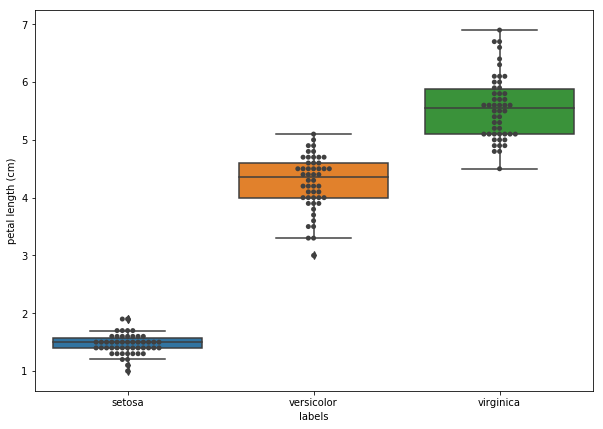

In [44]:
#adds layer of distribution over boxplot
plt.figure(figsize=(10,7))
ax = sns.boxplot(x="labels", y="petal length (cm)", data=df)
ax = sns.swarmplot(x="labels", y="petal length (cm)", data=df, color=".25")

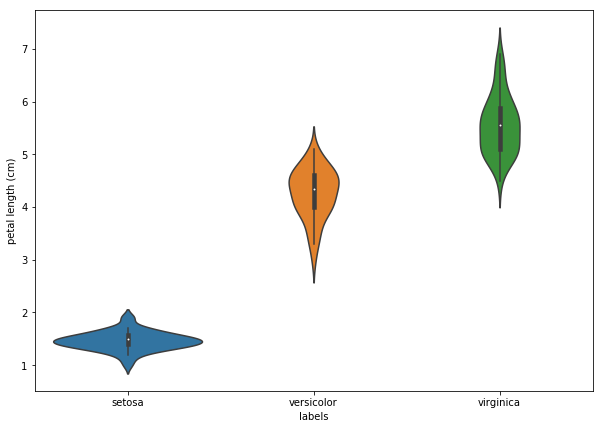

In [45]:
plt.figure(figsize=(10,7))
sns.violinplot(x="labels", y="petal length (cm)", data=df, size=6);

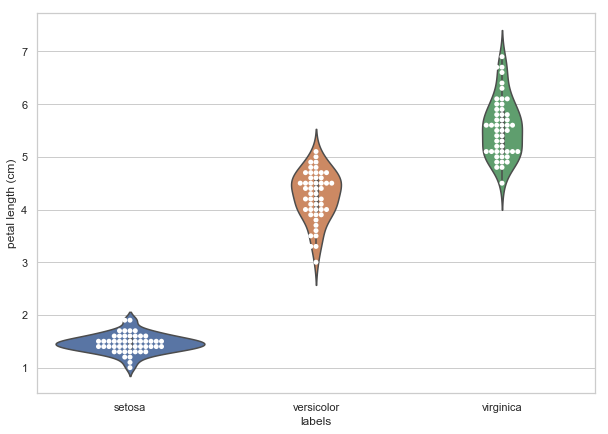

In [314]:
plt.figure(figsize=(10,7))
sns.violinplot(x="labels", y="petal length (cm)", data=df, size=6)
sns.swarmplot(x="labels", y="petal length (cm)", data=df, color="white");

#### Visualize *relationships*.
- Allows us to understand if and how one variable changes when another changes.

<Figure size 432x288 with 0 Axes>

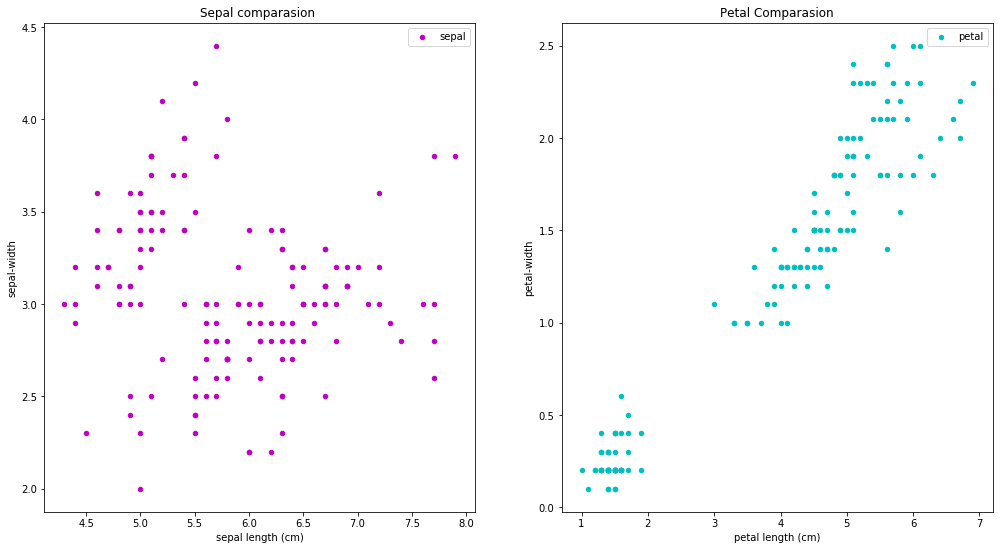

In [120]:
#Plotting Petal Length vs Petal Width & Sepal Length vs Sepal width
plt.figure();
fig,ax=plt.subplots(1,2,figsize=(17, 9));
df.plot(x="sepal length (cm)",y="sepal width (cm)",kind="scatter", \
        ax=ax[0],label="sepal",color='m');
df.plot(x="petal length (cm)",y="petal width (cm)",kind="scatter", \
        ax=ax[1],label="petal",color='c');
ax[0].set(title='Sepal comparasion ', ylabel='sepal-width')
ax[1].set(title='Petal Comparasion',  ylabel='petal-width')
ax[0].legend();
ax[1].legend();

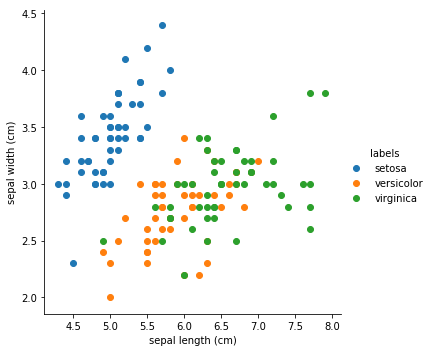

In [121]:
#seaborn to plot by species
sns.FacetGrid(df, hue='labels', height=5)\
   .map(plt.scatter, 'sepal length (cm)', 'sepal width (cm)')\
   .add_legend();

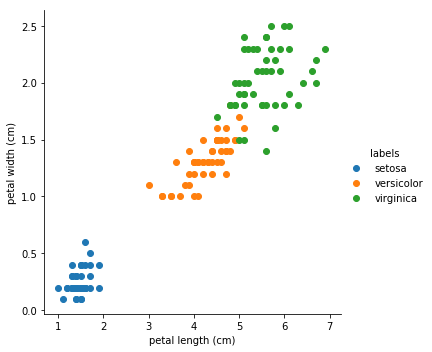

In [122]:
sns.FacetGrid(df, hue='labels', height=5)\
   .map(plt.scatter, 'petal length (cm)', 'petal width (cm)')\
   .add_legend();

### Heatmap
Explores the correlation of features by creating a correlation matrix.

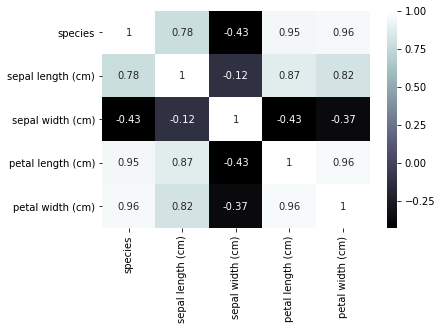

In [98]:
#with sns.axes_style("white"):
sns.heatmap(df.corr(), annot=True, cmap= 'bone');